<a href="https://colab.research.google.com/github/AggieSportsAnalytics/womens-soccer/blob/ayaan/ASATest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install supervision ultralytics opencv-python matplotlib tqdm roboflow --quiet

%cd /content
!rm -rf /content/sports
!git clone https://github.com/roboflow/sports.git /content/sports
%cd /content/sports
!pip install -e .


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.7 MB/s eta 0:00:00
/content
Cloning into '/content/sports'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 323 (delta 91), reused 90 (delta 79), pack-reused 199 (from 2)
Receiving objects: 100% (323/323), 3.13 MiB | 28.90 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/sports
Obtaining file:///content/sports
  Preparing metadata (setup.py) ... done


In [3]:
import cv2, numpy as np, supervision as sv
from sports.configs.soccer import SoccerPitchConfiguration as CONFIG
from sports.common.view import ViewTransformer
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch

CONFIG = CONFIG()
print("Imports and config ready")


Imports and config ready


In [4]:
from sports.common.team import TeamClassifier
import supervision as sv

team_classifier = TeamClassifier(device="cuda")
tracker = sv.ByteTrack()

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [5]:
from roboflow import Roboflow

rf = Roboflow(api_key="JiMh9F0EeXOInFVVeqUD")

# load the projects + versions
player_model = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc").version(1).model
ball_model = rf.workspace("roboflow-jvuqo").project("football-ball-detection-rejhg").version(1).model
field_model = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi").version(1).model

print(" Roboflow models loaded successfully!")


loading Roboflow workspace...
loading Roboflow project...
loading Roboflow workspace...
loading Roboflow project...
loading Roboflow workspace...
loading Roboflow project...
 Roboflow models loaded successfully!


Frame 0: 17 players, 0 balls


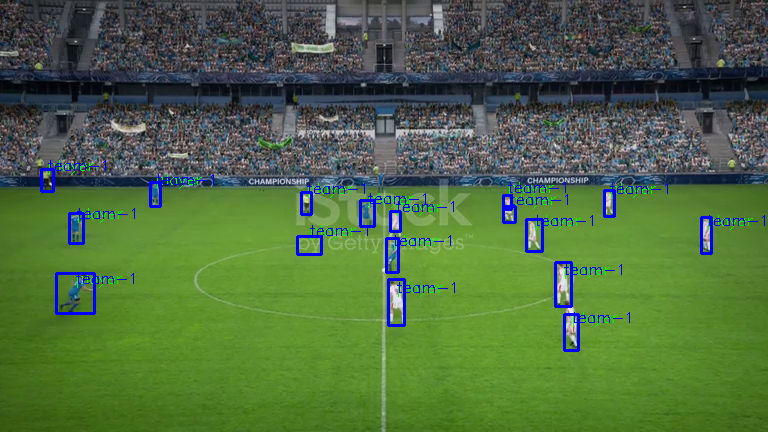

Embedding extraction: 4it [00:02,  1.56it/s]


✅ Team classifier trained!


Embedding extraction: 1it [00:00,  3.30it/s]
Embedding extraction: 1it [00:00,  3.17it/s]
Embedding extraction: 1it [00:00,  3.19it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
Embedding extraction: 1it [00:00,  3.01it/s]


Frame 10: 16 players, 1 balls


Embedding extraction: 1it [00:00,  3.17it/s]
Embedding extraction: 1it [00:00,  3.66it/s]
Embedding extraction: 1it [00:00,  3.51it/s]
Embedding extraction: 1it [00:00,  3.16it/s]
Embedding extraction: 1it [00:00,  3.37it/s]
Embedding extraction: 1it [00:00,  3.50it/s]
Embedding extraction: 1it [00:00,  3.08it/s]
Embedding extraction: 1it [00:00,  3.49it/s]
Embedding extraction: 1it [00:00,  3.38it/s]
Embedding extraction: 1it [00:00,  3.55it/s]


Frame 20: 16 players, 1 balls


Embedding extraction: 1it [00:00,  4.13it/s]
Embedding extraction: 1it [00:00,  4.91it/s]
Embedding extraction: 1it [00:00,  3.99it/s]
Embedding extraction: 1it [00:00,  4.34it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
Embedding extraction: 1it [00:00,  4.31it/s]
Embedding extraction: 1it [00:00,  3.96it/s]
Embedding extraction: 1it [00:00,  3.96it/s]
Embedding extraction: 1it [00:00,  3.98it/s]
Embedding extraction: 1it [00:00,  4.03it/s]


Frame 30: 14 players, 0 balls


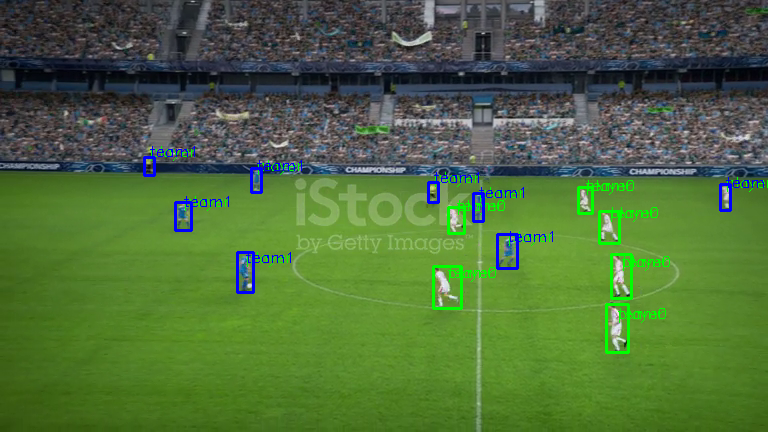

Embedding extraction: 1it [00:00,  3.44it/s]
Embedding extraction: 1it [00:00,  3.24it/s]
Embedding extraction: 1it [00:00,  3.22it/s]
Embedding extraction: 1it [00:00,  3.45it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
Embedding extraction: 1it [00:00,  3.24it/s]
Embedding extraction: 1it [00:00,  3.33it/s]
Embedding extraction: 1it [00:00,  3.91it/s]
Embedding extraction: 1it [00:00,  4.15it/s]
Embedding extraction: 1it [00:00,  3.47it/s]


Frame 40: 16 players, 0 balls


Embedding extraction: 1it [00:00,  4.15it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
Embedding extraction: 1it [00:00,  3.88it/s]
Embedding extraction: 1it [00:00,  3.22it/s]
Embedding extraction: 1it [00:00,  3.60it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
Embedding extraction: 1it [00:00,  3.14it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
Embedding extraction: 1it [00:00,  3.29it/s]
Embedding extraction: 1it [00:00,  3.52it/s]


Frame 50: 17 players, 0 balls


Embedding extraction: 1it [00:00,  3.49it/s]
Embedding extraction: 1it [00:00,  3.54it/s]
Embedding extraction: 1it [00:00,  3.27it/s]
Embedding extraction: 1it [00:00,  3.76it/s]
Embedding extraction: 1it [00:00,  4.27it/s]


Done! Saved to soccer_output.mp4 and logged to /content/analysis_log.txt


In [6]:
import cv2, tempfile, os
from google.colab.patches import cv2_imshow
import supervision as sv
from sports.common.team import TeamClassifier

team_classifier = TeamClassifier(device="cuda")
tracker = sv.ByteTrack()
player_crops_accum = []
trained = False

video_path = "/content/drive/MyDrive/Senior/trimmedinput.mp4"
log_path = "/content/analysis_log.txt"

# Create or overwrite the log file
with open(log_path, "w") as log:
    log.write("Frame\tPlayers\tBall_x\tBall_y\tPlayer_coords\n")

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter("soccer_output.mp4",
                      cv2.VideoWriter_fourcc(*"mp4v"),
                      fps, (w, h))

frame_i = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    with tempfile.NamedTemporaryFile(suffix=".jpg") as tmp:
        cv2.imwrite(tmp.name, frame)

        # --- Player detections ---
        player_preds = player_model.predict(tmp.name, confidence=30).json()
        players = player_preds.get("predictions", [])
        for det in players:
            x, y, w_, h_ = int(det["x"]), int(det["y"]), int(det["width"]), int(det["height"])
            cv2.rectangle(frame, (x - w_//2, y - h_//2), (x + w_//2, y + h_//2), (0,255,0), 2)
            cv2.putText(frame, "player", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

        player_crops = []
        for det in players:
            x, y, w_, h_ = int(det["x"]), int(det["y"]), int(det["width"]), int(det["height"])
            crop = frame[y - h_//2 : y + h_//2, x - w_//2 : x + w_//2]
            if crop.size > 0:
                player_crops.append(crop)
                player_crops_accum.append(crop)

        # Train team classifier after collecting enough samples
        if not trained and len(player_crops_accum) > 100:
            team_classifier.fit(player_crops_accum)
            trained = True
            print("✅ Team classifier trained!")

        if trained:
            team_labels = team_classifier.predict(player_crops)
        else:
            team_labels = [-1] * len(player_crops)  # unknown team until trained

        # Assign and draw colored boxes based on team ID
        for (det, team_id) in zip(players, team_labels):
            x, y, w_, h_ = int(det["x"]), int(det["y"]), int(det["width"]), int(det["height"])
            color = (0, 255, 0) if team_id == 0 else (255, 0, 0)
            cv2.rectangle(frame, (x - w_//2, y - h_//2), (x + w_//2, y + h_//2), color, 2)
            cv2.putText(frame, f"team{team_id}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

        # --- Ball detections ---
        ball_preds = ball_model.predict(tmp.name, confidence=30).json()
        balls = ball_preds.get("predictions", [])
        for det in balls:
            x, y, w_, h_ = int(det["x"]), int(det["y"]), int(det["width"]), int(det["height"])
            cv2.circle(frame, (x, y), 10, (0,255,255), 2)
            cv2.putText(frame, "ball", (x, y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,255), 1)

        # --- Field detections (optional debug) ---
        field_preds = field_model.predict(tmp.name, confidence=30).json()
        for det in field_preds.get("predictions", []):
            if "x" in det and "y" in det:
                x, y = int(det["x"]), int(det["y"])
                cv2.circle(frame, (x, y), 4, (255,0,0), -1)
            elif "points" in det:
                for pt in det["points"]:
                    px, py = int(pt["x"]), int(pt["y"])
                    cv2.circle(frame, (px, py), 3, (255, 0, 0), -1)

    # ---- Debug info ----
    if frame_i % 10 == 0:
        print(f"Frame {frame_i}: {len(players)} players, {len(balls)} balls")

    # ---- Logging section ----
    ball_x, ball_y = "-", "-"
    if len(balls) > 0:
        ball_x, ball_y = int(balls[0]['x']), int(balls[0]['y'])

    # Record up to first 3 player coordinates (for brevity)
    player_coords = ", ".join([f"({int(p['x'])},{int(p['y'])})" for p in players[:3]])

    with open(log_path, "a") as log:
        log.write(f"{frame_i}\t{len(players)}\t{ball_x}\t{ball_y}\t{player_coords}\n")

    out.write(frame)

    if frame_i % 30 == 0:  # show every 30 frames visually
        cv2_imshow(frame)

    frame_i += 1

cap.release()
out.release()

print(f"Done! Saved to soccer_output.mp4 and logged to {log_path}")

In [ ]:
# from roboflow import Roboflow

# rf = Roboflow(api_key="JiMh9F0EeXOInFVVeqUD")

# Load public models
# player_model = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc").version(1).model
# ball_model   = rf.workspace("roboflow-jvuqo").project("football-ball-detection-rejhg").version(1).model
# field_model  = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi").version(1).model

# print("Models loaded successfully!")
